### Import Standard Python Libraries

### Packages Import
These are all the packages we'll be using. Importing individual libraries make it easy for us to use them without having to call the parent libraries.

In [1]:
# System Libraries
import math
import random

# Data Manipulation 
import numpy as np
import pandas as pd
import scipy.stats as stats

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

# Feature Selection and Encoding
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Machine learning 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , RandomForestClassifier

# Grid and Random Search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

### Data Loading
The data comes separated into the Training and Test datasets.

In [2]:
# Load Training and Test Data Sets
train_df = pd.read_csv('C:\\Users\\nisha\\Desktop\\Summer Analytics\\Week_6\\train.csv')
test_df = pd.read_csv('C:\\Users\\nisha\\Desktop\\Summer Analytics\\Week_6\\test.csv') 

In [3]:
# Moving the response variable at the last
Response_var = train_df['Attrition']
train_df.drop(labels= ['Attrition'] , axis = 1 , inplace = True)
train_df.insert(train_df.shape[1],'Attrition' , Response_var)

In [4]:
# Have a quick look at the test dataset
train_df.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,Attrition
0,1,30,Non-Travel,Research & Development,2,3,Medical,571,3,Female,...,0,12,2,11,7,6,7,4,1,0
1,2,36,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,...,2,7,2,3,2,1,1,2,1,0
2,3,55,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,0,12,3,9,7,7,3,5,1,1
3,4,39,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,...,0,18,2,7,7,1,7,4,1,0
4,5,37,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,...,1,10,2,10,7,7,8,1,1,0


In [5]:
# Looking at the no of rows and columns the training dataset has 
train_df.shape

(1628, 29)

In [6]:
# Have a quick look at the test dataset
test_df.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1


In [7]:
# Looking at the no of rows and columns the training dataset has 
test_df.shape

(470, 28)

### Data Exploration - Univariate
When exploring our dataset and its features, we have many options available to us. We can explore each feature individually, or compare pairs of features, finding the correlation between them. Let's start with some simple Univariate (one feature) analysis.

Features can be of multiple types:

`Nominal` : is for mutual exclusive, but not ordered, categories.  
`Ordinal` : is one where the order matters but not the difference between values.  
`Interval`: is a measurement where the difference between two values is meaningful.  
`Ratio` : has all the properties of an interval variable, and also has a clear definition of 0.0.  

There are multiple ways of manipulating each feature type, but for simplicity, we'll define only two feature types:  

`Numerical` : any feature that contains numeric values.  
`Categorical` : any feature that contains categories, or text.

In [8]:
# Describing all the numerical features
train_df.describe()

,Id,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,Attrition
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,...,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0,1628.000000
mean,814.500000,35.645577,9.735258,2.884521,1000.985872,2.646192,2.650491,2.639435,5785.524570,2.761671,...,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0,0.482187
std,470.107435,9.481794,8.306546,1.020470,585.417694,1.125283,0.736330,1.096272,4339.293147,2.549995,...,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0,0.499836
min,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000
25%,407.750000,29.000000,2.000000,2.000000,509.250000,2.000000,2.000000,2.000000,2625.000000,1.000000,...,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0,0.000000
50%,814.500000,34.000000,8.000000,3.000000,977.000000,3.000000,3.000000,3.000000,4304.000000,2.000000,...,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0,0.000000
75%,1221.250000,42.000000,15.000000,4.000000,1494.000000,4.000000,3.000000,4.000000,7124.250000,4.000000,...,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0,1.000000
max,1628.000000,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,4.000000,19999.000000,9.000000,...,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0,1.000000


In [9]:
# Describing all the categorical features 
train_df.describe(include = ['O'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1628,1628,1628,1628,1628,1628,1628
unique,3,3,6,2,9,3,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1105,979,623,996,365,681,1000


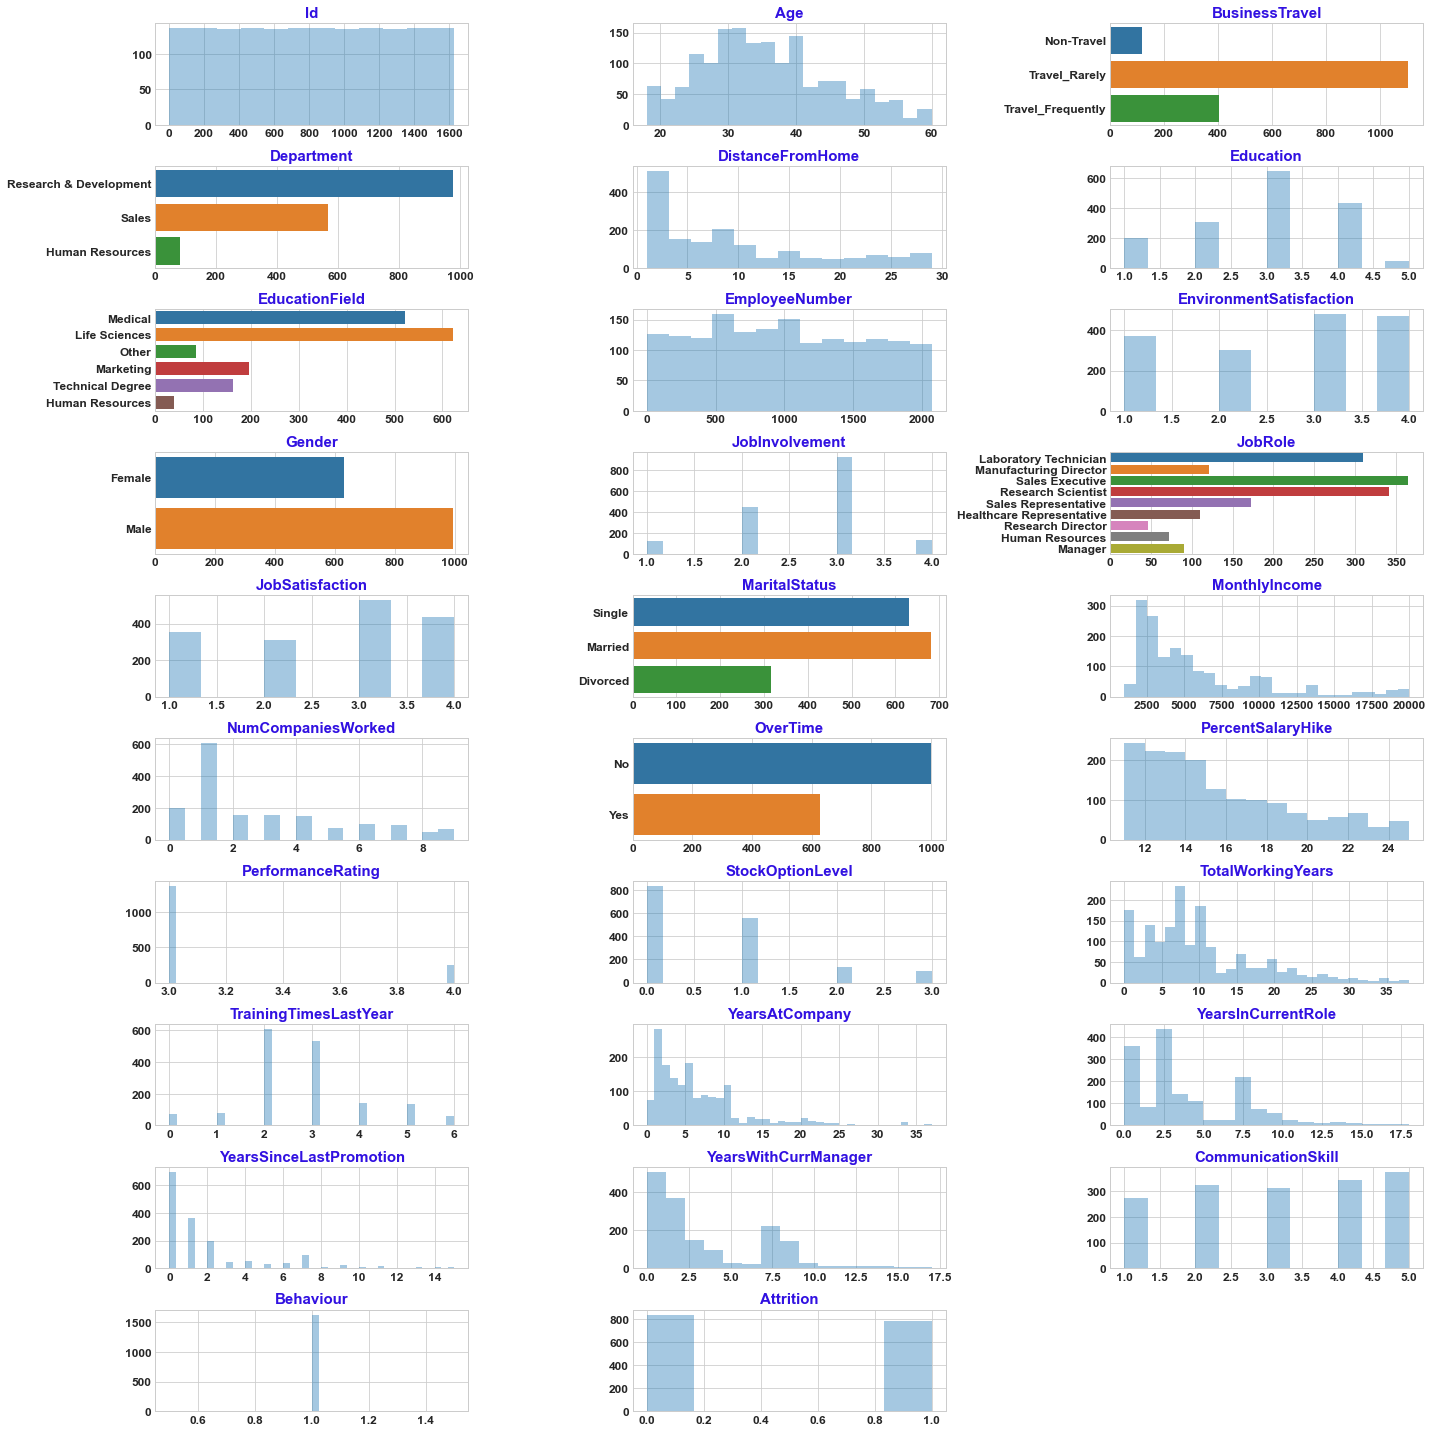

In [10]:
# Plotting the distribution of each feature
def plot_distribution(dataset, cols=3):
    fig = plt.figure(figsize=(20,20))
    for i in range(0,dataset.shape[1]):
        plt.style.use('seaborn-whitegrid')
        rows = math.ceil(float(dataset.shape[1]) / cols)
        ax = plt.subplot(rows,cols,i+1)
        dat_col = dataset.columns[i]
        ax.set_title(dat_col , fontweight='bold' , color = '#3111E1' , fontsize = 15)
        if dataset[dat_col].dtypes == np.object:
            g = sns.countplot(y= dat_col , data=dataset)
            plt.xlabel('')
            plt.ylabel('')
            plt.xticks(fontweight='bold' , fontsize = 12)
            plt.yticks(fontweight='bold' , fontsize = 12)
        else :
            g = sns.distplot(dataset[dat_col] , kde = False)
            plt.xlabel('')
            plt.ylabel('')
            plt.yticks(fontweight='bold' , fontsize = 12)
            plt.xticks(fontweight='bold' , fontsize = 12)
        plt.tight_layout()
    
plot_distribution(train_df, cols=3)  

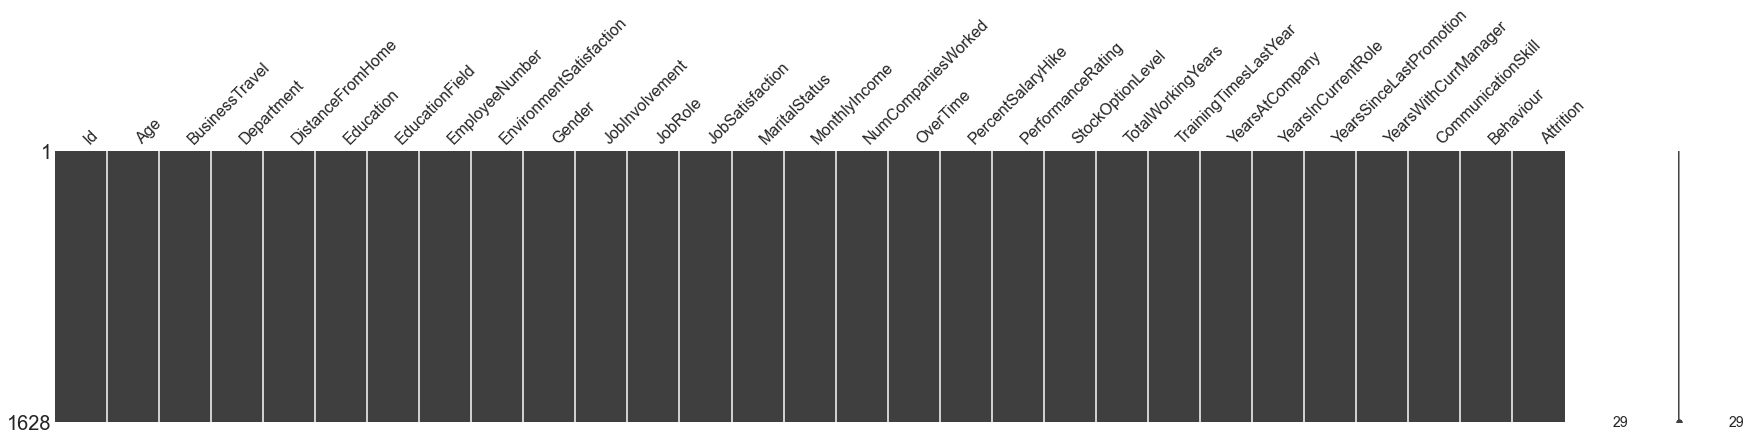

In [11]:
# How many missing values are there in our dataset ?
missingno.matrix(train_df, figsize = (30,5));

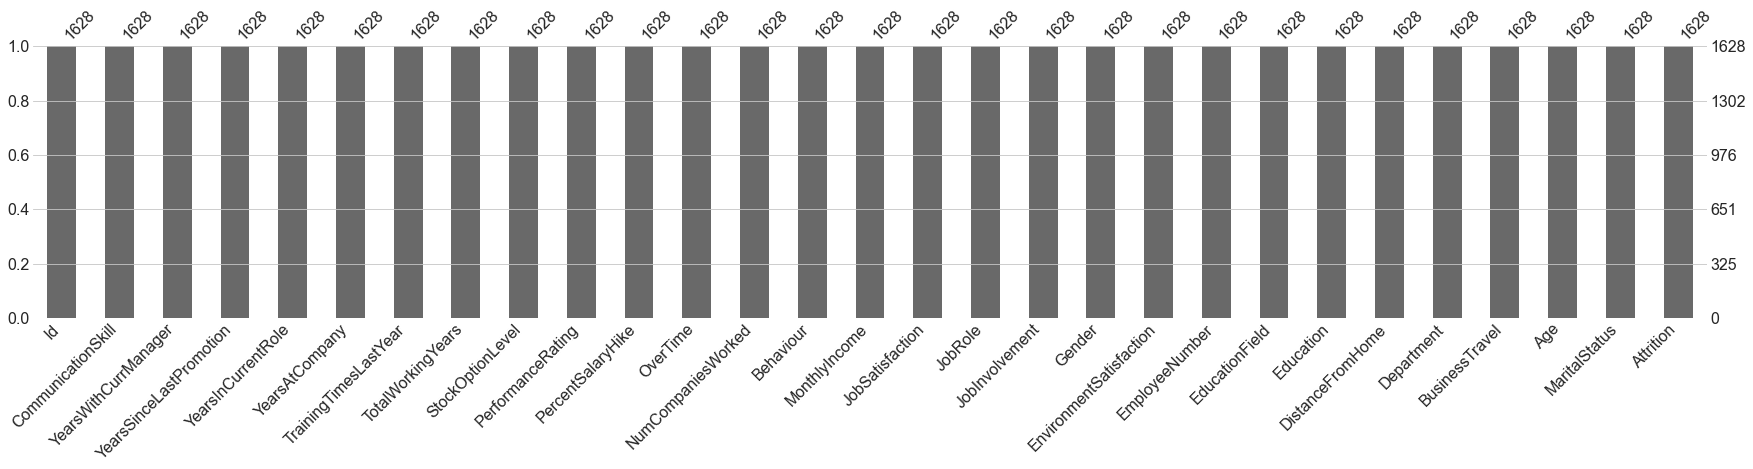

In [12]:
missingno.bar(train_df, sort='ascending', figsize = (30,5));

### **Feature Cleaning, Engineering, and Imputation**
### **Cleaning:**

To clean our data, we'll need to work with:

**Missing values:** Either omit elements from a dataset that contain missing values or impute them (fill them in). 

**Special values:** Numeric variables are endowed with several formalized special values including ±Inf, NA and NaN.               
Calculations involving special values often result in special values, and need to be handled/cleaned.  

**Outliers:** They should be detected, but not necessarily removed. Their inclusion in the analysis is a statistical decision. 


**Obvious inconsistencies:** A person's age cannot be negative, a man cannot be pregnant and an under-aged person cannot possess a drivers license. Find the inconsistencies and plan for them.   

### **Engineering**: 

There are multiple techniques for feature engineering:

**Decompose:** Converting 2014-09-20T20:45:40Z into categorical attributes like hour_of_the_day, part_of_day, etc.  

**Discretization:** We can choose to either discretize some of the continuous variables we have, as some algorithms will perform faster. 

We'll call these datasets:

dataset_bin => where Continuous variables are Discretised

dataset_con => where Continuous variables are Continuous

**Reframe Numerical Quantities:** Changing from grams to kg, and losing detail might be both wanted and efficient for calculation.

**Feature Crossing:** Creating new features as a combination of existing features. Could be multiplying numerical features, or combining categorical variables. This is a great way to add domain expertise knowledge to the dataset.  

### **Imputation:**

We can impute missing values in a number of different ways:

**Hot-Deck:** The technique finds the first missing value and uses the cell value immediately prior to the data that are missing to impute the missing value.  

**Cold-Deck:** Selects donors from another dataset to complete missing data.  

**Mean-substitution:** Another imputation technique involves replacing any missing value with the mean of that variable for all other cases, which has the benefit of not changing the sample mean for that variable.  

**Regression:** A regression model is estimated to predict observed values of a variable based on other variables, and that model is then used to impute values in cases where that variable is missing.

In [13]:
# To contain our dataframe with our discretized variables
dataset_bin = pd.DataFrame()

In [14]:
# Function to plot a histigram and QQ plot

def diagnostic_plots(data , variable) :

    plt.figure(figsize = (8,4))
    
    plt.subplot(1,2,1)
    data[variable].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(data[variable] , dist = 'norm' , plot = plt)
    
    plt.show()

### Feature : ID

In [15]:
# Copying ID column to discretised and continuous dataframes
dataset_bin['Id'] = train_df['Id']

### Feature : Age

We will use the Pandas Cut function to bin the data in equally sized buckets. 

We will also add our original feature to the dataset_con dataframe.

In [16]:
# Copying Age column to discretised and continuous dataframes
dataset_bin['Age'] = pd.cut(train_df['Age'] , 8) # discretised

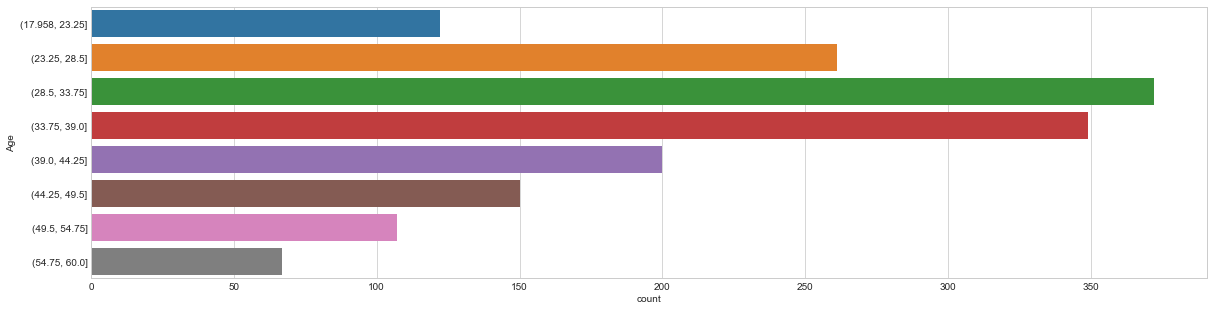

In [17]:
# Plotting the discretised and the continuous age 
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
sns.countplot(y="Age", data=dataset_bin);

### Feature : Business Travel

In [18]:
# Copying Business Travel column to discretised and continuous dataframes
dataset_bin['BusinessTravel'] = train_df['BusinessTravel']

### Feature : Department

In [19]:
# Copying Department column to discretised and continuous dataframes
dataset_bin['Department'] = train_df['Department']

### Feature : DistanceFromHome

In [20]:
# Copying DistanceFromHome column to discretised and continuous dataframes
dataset_bin['DistanceFromHome'] = pd.cut(train_df['DistanceFromHome'],5)
# diagnostic_plots(dataset_con , 'DistanceFromHome')

### Feature : Education

In [21]:
# Copying Department column to discretised and continuous dataframes
dataset_bin['Education'] = train_df['Education']

### Feature : Education Field

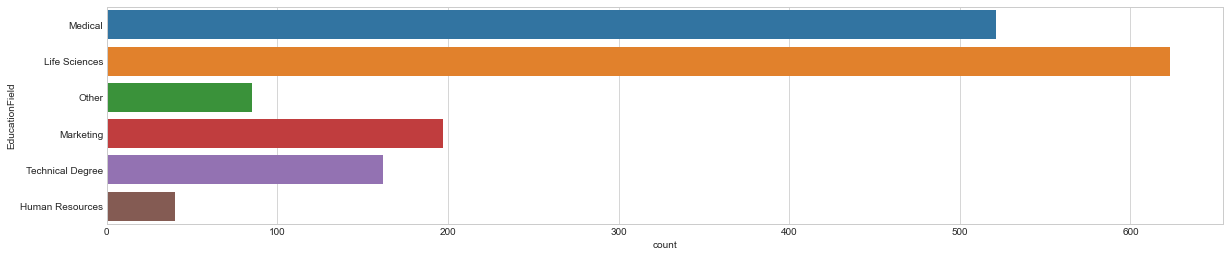

In [22]:
# Can we bucket some of these groups?
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20,4))
sns.countplot(y = 'EducationField' , data = train_df);

In [23]:
# Create buckets for Education Field in the training dataset
train_df.loc[train_df['EducationField'] == 'Life Sciences' , 'EducationField'] = 'Medical'
train_df.loc[train_df['EducationField'] == 'Marketing' , 'EducationField'] = 'Management'
train_df.loc[train_df['EducationField'] == 'Human Resources' , 'EducationField'] = 'Management'
train_df.loc[train_df['EducationField'] == 'Technical Degree' , 'EducationField'] = 'Technical'

dataset_bin['EducationField'] = train_df['EducationField']

In [24]:
# Create buckets for Education Field in the testing dataset
test_df.loc[test_df['EducationField'] == 'Life Sciences' , 'EducationField'] = 'Medical'
test_df.loc[test_df['EducationField'] == 'Marketing' , 'EducationField'] = 'Management'
test_df.loc[test_df['EducationField'] == 'Human Resources' , 'EducationField'] = 'Management'
test_df.loc[test_df['EducationField'] == 'Technical Degree' , 'EducationField'] = 'Technical'

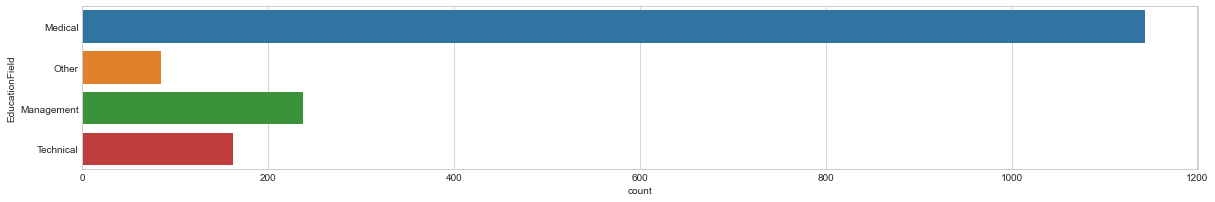

In [25]:
# Plotting the new buckets
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20,3))
sns.countplot(y = 'EducationField' , data = dataset_bin);

### Features : EmployeeNumber, EnvironmentSatisfaction , Gender, JobInvolvement

In [26]:
# Copying EmployeeNumber, EnvironmentSatisfaction , Gender, JobInvolvement column to discretised and continuous dataframes
dataset_bin['EmployeeNumber'] = train_df['EmployeeNumber']
dataset_bin['EnvironmentSatisfaction'] = train_df['EnvironmentSatisfaction']
dataset_bin['Gender'] = train_df['Gender']
dataset_bin['JobInvolvement'] = train_df['JobInvolvement']

### Feature : Job Role

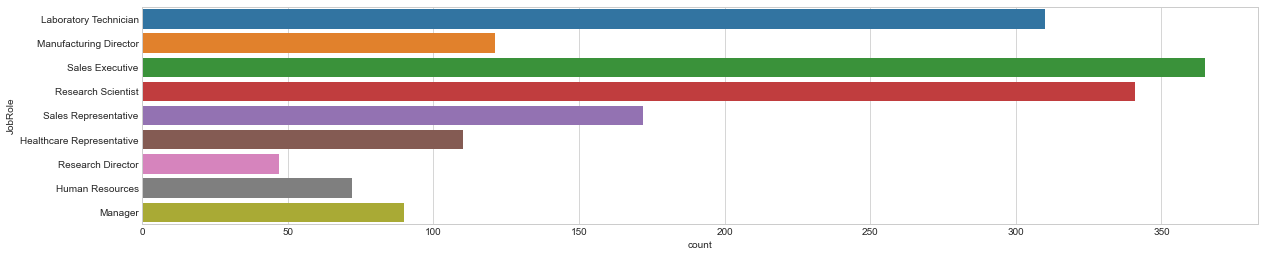

In [27]:
# Can we bucket some of these groups?
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (20,4))
sns.countplot(y = 'JobRole' , data = train_df);

In [28]:
# Create buckets for JobRole Field in the training set
train_df.loc[train_df['JobRole'] == 'Laboratory Technician' , 'JobRole'] = 'Healthcare Representative'
train_df.loc[train_df['JobRole'] == 'Sales Executive' , 'JobRole'] = 'Sales Representative'
train_df.loc[train_df['JobRole'] == 'Research Scientist' , 'JobRole'] = 'Research Representative'
train_df.loc[train_df['JobRole'] == 'Research Director' , 'JobRole'] = 'Research Representative'
train_df.loc[train_df['JobRole'] == 'Laboratory Technician' , 'JobRole'] = 'Healthcare Representative'
train_df.loc[train_df['JobRole'] == 'Manufacturing Director' , 'JobRole'] = 'Manufacturing Representative'
train_df.loc[train_df['JobRole'] == 'Human Resources' , 'JobRole'] = 'HR Representative'

dataset_bin['JobRole'] = train_df['JobRole']

In [29]:
# Create buckets for JobRole Field in the testing set
test_df.loc[test_df['JobRole'] == 'Laboratory Technician' , 'JobRole'] = 'Healthcare Representative'
test_df.loc[test_df['JobRole'] == 'Sales Executive' , 'JobRole'] = 'Sales Representative'
test_df.loc[test_df['JobRole'] == 'Research Scientist' , 'JobRole'] = 'Research Representative'
test_df.loc[test_df['JobRole'] == 'Research Director' , 'JobRole'] = 'Research Representative'
test_df.loc[test_df['JobRole'] == 'Laboratory Technician' , 'JobRole'] = 'Healthcare Representative'
test_df.loc[test_df['JobRole'] == 'Manufacturing Director' , 'JobRole'] = 'Manufacturing Representative'
test_df.loc[test_df['JobRole'] == 'Human Resources' , 'JobRole'] = 'HR Representative'

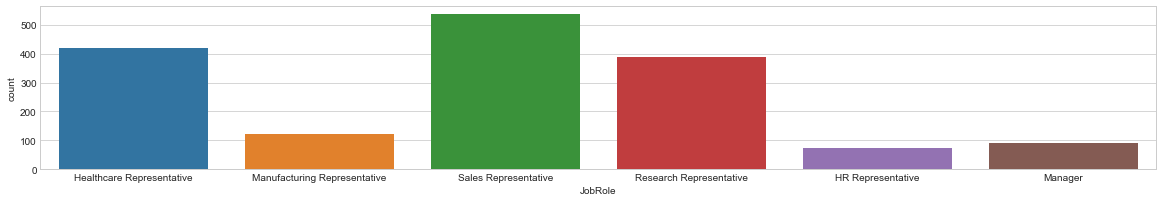

In [30]:
# Plotting the new buckets
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (20,3))
sns.countplot('JobRole' , data = dataset_bin);

### Feature : JobSatisfaction , MaritalStatus

In [31]:
# Copying JobSatisfaction , MaritalStatus column to discretised and continuous dataframes
dataset_bin['JobSatisfaction'] = train_df['JobSatisfaction']
dataset_bin['MaritalStatus'] = train_df['MaritalStatus']

### Feature : MonthlyIncome 

In [32]:
# Copying MonthlyIncome column to discretised and continuous dataframes
dataset_bin['MonthlyIncome'] = pd.cut(train_df['MonthlyIncome'],10)
# diagnostic_plots(dataset_con , 'MonthlyIncome')

### Feature : NumCompaniesWorked  , OverTime

In [33]:
# Copying NumCompaniesWorked , OverTime column to discretised and continuous dataframes
dataset_bin['NumCompaniesWorked'] = train_df['NumCompaniesWorked']
dataset_bin['OverTime'] = train_df['OverTime']

### Feature : PercentSalaryHike

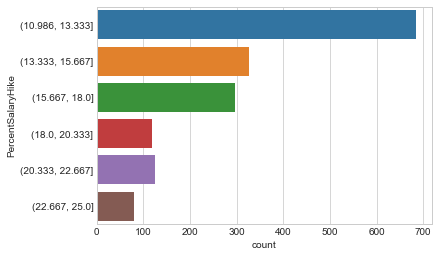

In [34]:
dataset_bin['PercentSalaryHike'] = pd.cut(train_df['PercentSalaryHike'],6)
sns.countplot(y = 'PercentSalaryHike' , data = dataset_bin);

### Feature : PerformanceRating , StockOptionLevel

In [35]:
# Copying PerformanceRating , StockOptionLevel column to discretised and continuous dataframes
dataset_bin['PerformanceRating'] = train_df['PerformanceRating']
dataset_bin['StockOptionLevel'] = train_df['StockOptionLevel']

### Feature : TotalWorkingYears

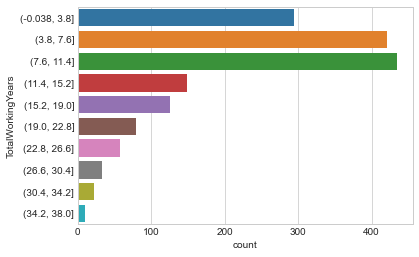

In [36]:
# Copying TotalWorkingYears to discretised and continuous dataframes
dataset_bin['TotalWorkingYears'] = pd.cut(train_df['TotalWorkingYears'],10)
sns.countplot(y = 'TotalWorkingYears' , data = dataset_bin);

### Feature : TrainingTimesLastYear

In [37]:
# Copying TrainingTimesLastYear to discretised and continuous dataframes
dataset_bin['TrainingTimesLastYear'] = train_df['TrainingTimesLastYear']

### Feature : YearsAtCompany

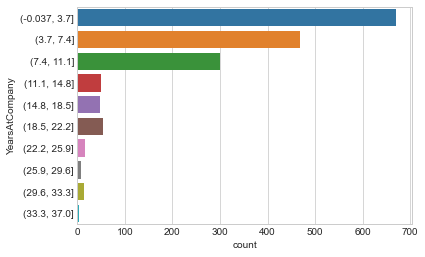

In [38]:
# Copying YearsAtCompany to discretised and continuous dataframes
dataset_bin['YearsAtCompany'] = pd.cut(train_df['YearsAtCompany'],10)
sns.countplot(y = 'YearsAtCompany' , data = dataset_bin);

### Feature : YearsInCurrentRole

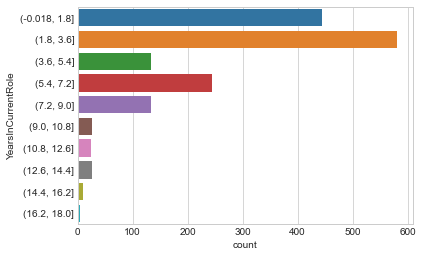

In [39]:
# Copying YearsInCurrentRole to discretised and continuous dataframes
dataset_bin['YearsInCurrentRole'] = pd.cut(train_df['YearsInCurrentRole'],10)
sns.countplot(y = 'YearsInCurrentRole' , data = dataset_bin);

### Feature : YearsSinceLastPromotion

In [40]:
# Copying YearsSinceLastPromotion to discretised and continuous dataframes
dataset_bin['YearsSinceLastPromotion'] = train_df['YearsSinceLastPromotion']

### Feature : YearsWithCurrManager

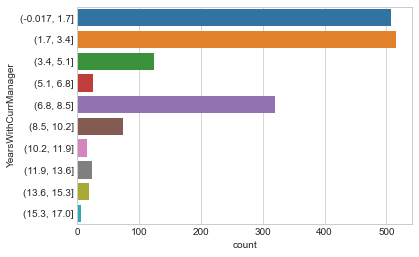

In [41]:
# Copying YearsWithCurrManager to discretised and continuous dataframes
dataset_bin['YearsWithCurrManager'] = pd.cut(train_df['YearsWithCurrManager'],10)
sns.countplot(y = 'YearsWithCurrManager' , data = dataset_bin);

### Feature : CommunicationSkill , Behaviour

In [42]:
# Copying CommunicationSkill , Behaviour to discretised and continuous dataframes
dataset_bin['CommunicationSkill'] = train_df['CommunicationSkill']
dataset_bin['Behaviour'] = train_df['Behaviour']

In [43]:
# Copying Attrition column to discretised and continuous dataframes 
dataset_bin['Attrition'] = train_df['Attrition']
dataset_bin.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,Attrition
0,1,"(28.5, 33.75]",Non-Travel,Research & Development,"(0.972, 6.6]",3,Medical,571,3,Female,...,0,"(11.4, 15.2]",2,"(7.4, 11.1]","(5.4, 7.2]",6,"(6.8, 8.5]",4,1,0
1,2,"(33.75, 39.0]",Travel_Rarely,Research & Development,"(6.6, 12.2]",4,Medical,1614,3,Female,...,2,"(3.8, 7.6]",2,"(-0.037, 3.7]","(1.8, 3.6]",1,"(-0.017, 1.7]",2,1,0
2,3,"(54.75, 60.0]",Travel_Rarely,Sales,"(0.972, 6.6]",1,Medical,842,3,Male,...,0,"(11.4, 15.2]",3,"(7.4, 11.1]","(5.4, 7.2]",7,"(1.7, 3.4]",5,1,1
3,4,"(33.75, 39.0]",Travel_Rarely,Research & Development,"(23.4, 29.0]",1,Medical,2014,1,Male,...,0,"(15.2, 19.0]",2,"(3.7, 7.4]","(5.4, 7.2]",1,"(6.8, 8.5]",4,1,0
4,5,"(33.75, 39.0]",Travel_Rarely,Research & Development,"(0.972, 6.6]",3,Other,689,3,Male,...,1,"(7.6, 11.4]",2,"(7.4, 11.1]","(5.4, 7.2]",7,"(6.8, 8.5]",1,1,0


### Bi-variate Analysis
So far, we have analysed all features individually. Let's now start combining some of these features together to obtain further insight into the interactions between them.

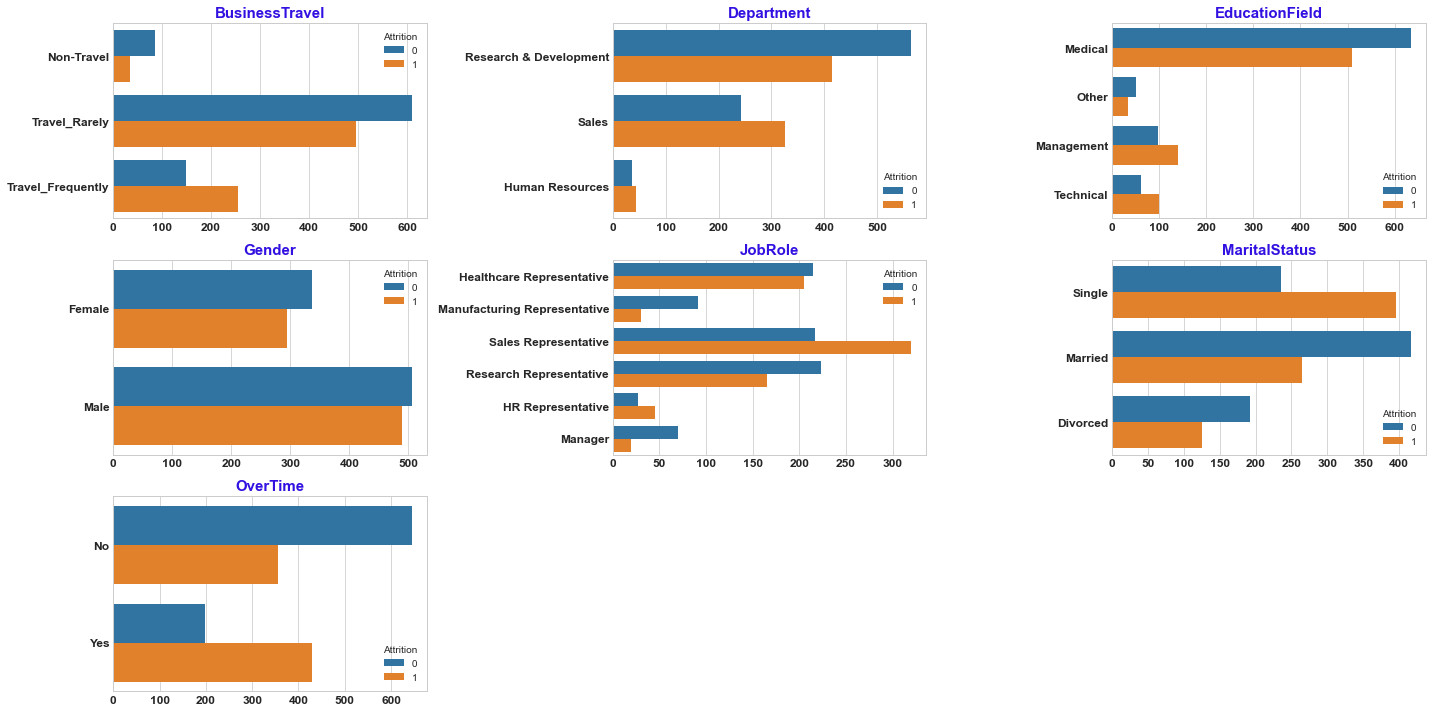

In [44]:
# Plot a count of the categories from each categorical feature split by our prediction class.
def plot_bivariate_bar(dataset, cols=3):
    fig = plt.figure(figsize=(20,10))
    dataset = dataset.select_dtypes(include=[np.object])
    for i in range(0,dataset.shape[1]):
        plt.style.use('seaborn-whitegrid')
        rows = math.ceil(float(dataset.shape[1]) / cols)
        ax = plt.subplot(rows,cols,i+1)
        dat_col = dataset.columns[i]
        ax.set_title(dat_col , fontweight='bold' , color = '#3111E1' , fontsize = 15)
        g = sns.countplot(y= dat_col , hue = train_df.iloc[:,train_df.shape[1]-1], data=dataset)
        plt.xlabel('')
        plt.ylabel('')
        plt.xticks(fontweight='bold' , fontsize = 12)
        plt.yticks(fontweight='bold' , fontsize = 12)
        plt.tight_layout()    
    
plot_bivariate_bar(train_df, cols=3) 

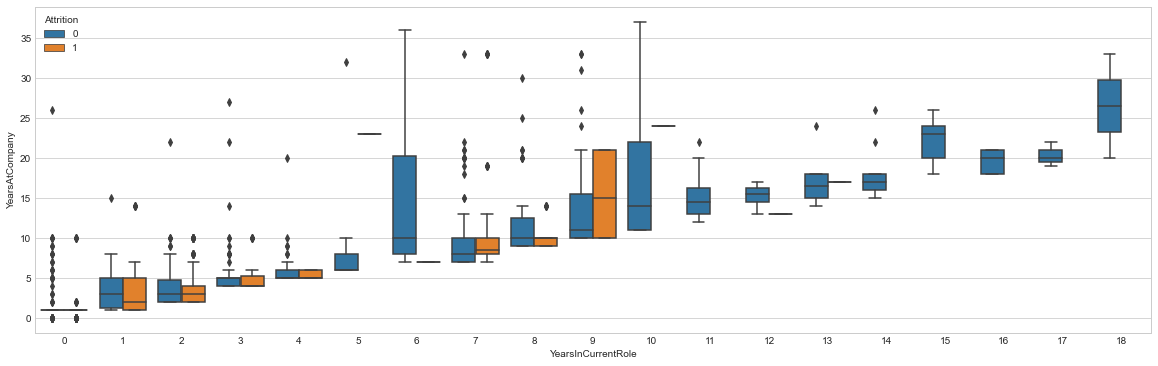

In [45]:
# Effect of YearsInCurrentRole and YearsAtCompany on Attrition.
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (20,6))
sns.boxplot('YearsInCurrentRole', 'YearsAtCompany' , hue = 'Attrition'  , data = train_df)

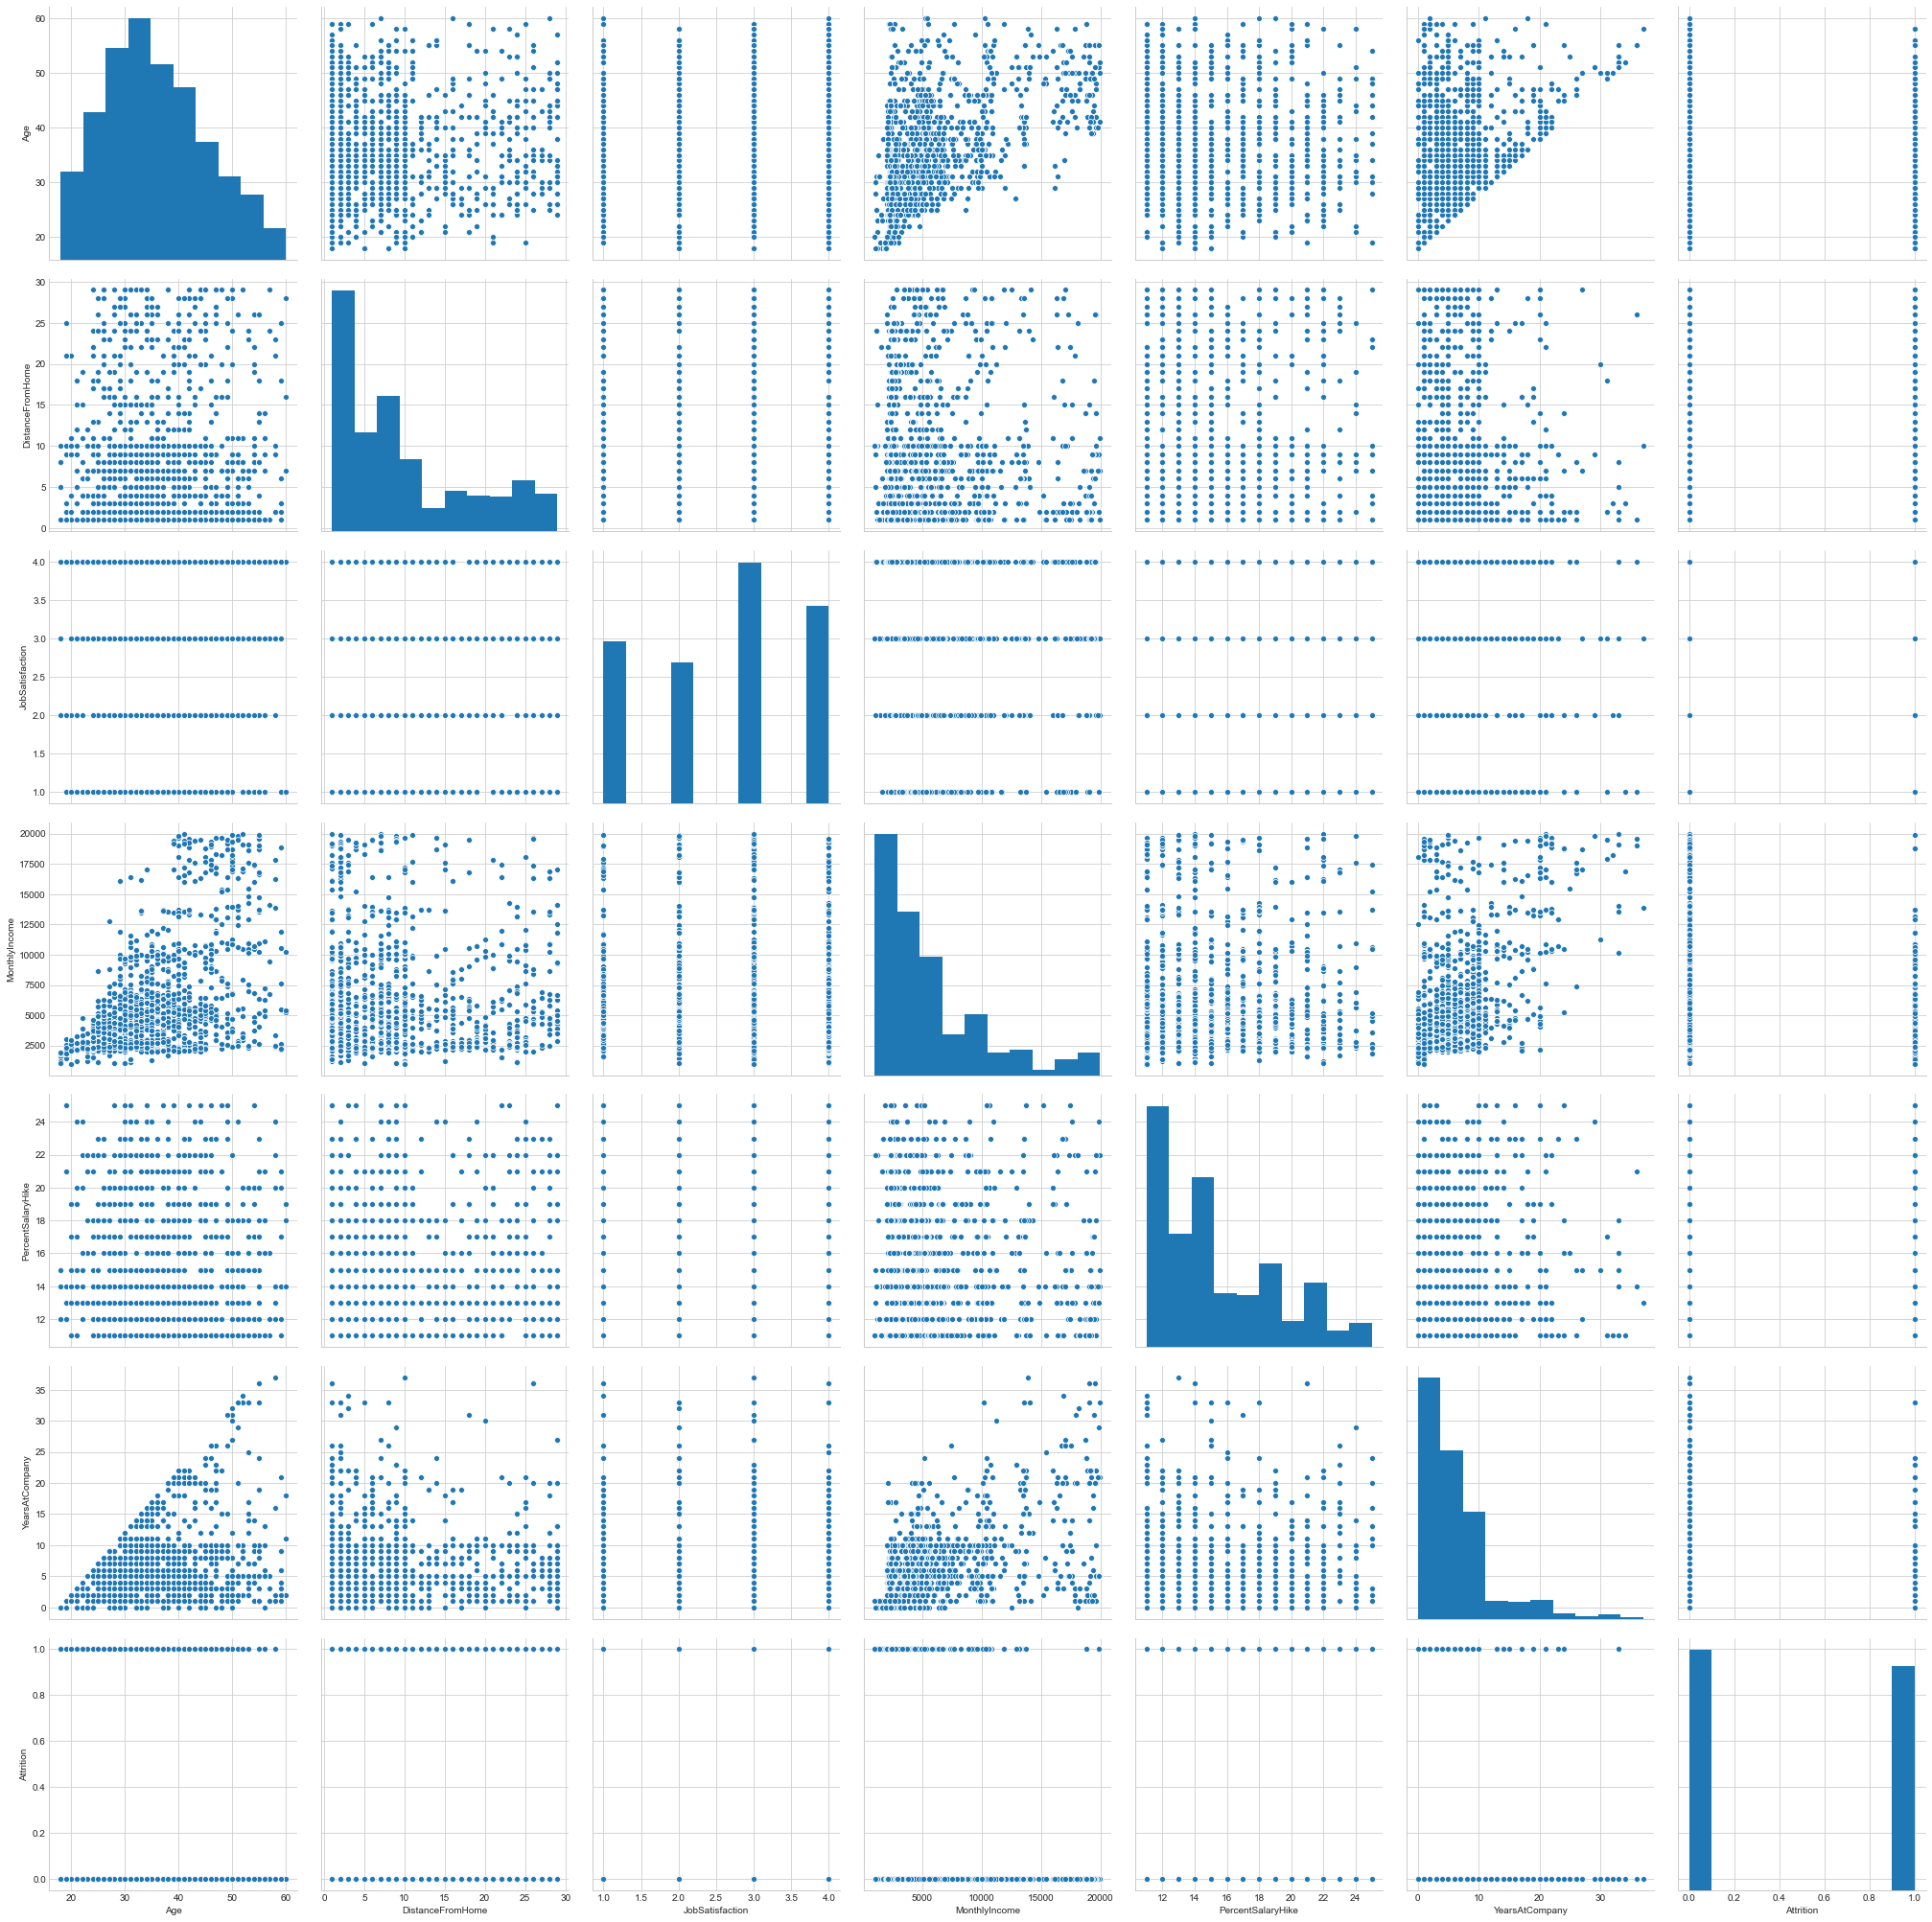

In [46]:
# Interaction between pairs of features.
x = ['Age', 'DistanceFromHome' , 'JobSatisfaction','MonthlyIncome', 'PercentSalaryHike', 'YearsAtCompany', 'Attrition']
sns.pairplot(train_df[x]  , size=4);

### Feature Crossing:

So far, we have modified and cleaned features that existed in our dataset. 

However, we can go further and create a new new variables, adding human knowledge on the interaction between features.

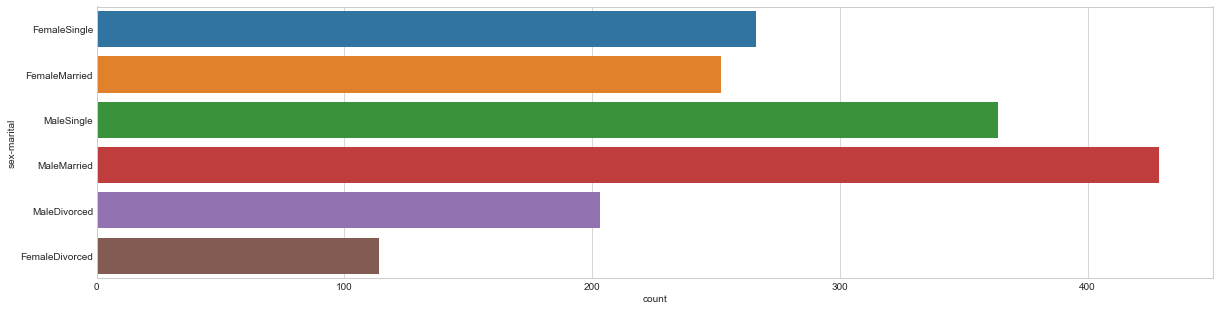

In [47]:
# Crossing Categorical Features :- Gender + Marital Status
dataset_bin['sex-marital'] = train_df['Gender'] + train_df['MaritalStatus']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
sns.countplot(y="sex-marital", data=dataset_bin);

### Feature Encoding

The process of converting Categorical Features into values is called Encoding. Let's perform both One-Hot and Label encoding.

In [48]:
# One Hot Encodes all labels before Machine Learning
one_hot_cols = dataset_bin.columns.tolist()
one_hot_cols.remove('Id')
one_hot_cols.remove('EmployeeNumber')
one_hot_cols.remove('Attrition')
dataset_bin_enc = pd.get_dummies(dataset_bin, columns=one_hot_cols)

dataset_bin_enc.head()

,Id,EmployeeNumber,Attrition,"Age_(17.958, 23.25]","Age_(23.25, 28.5]","Age_(28.5, 33.75]","Age_(33.75, 39.0]","Age_(39.0, 44.25]","Age_(44.25, 49.5]","Age_(49.5, 54.75]",...,CommunicationSkill_3,CommunicationSkill_4,CommunicationSkill_5,Behaviour_1,sex-marital_FemaleDivorced,sex-marital_FemaleMarried,sex-marital_FemaleSingle,sex-marital_MaleDivorced,sex-marital_MaleMarried,sex-marital_MaleSingle
0,1,571,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
1,2,1614,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,3,842,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,4,2014,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,5,689,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [49]:
# Label Encode all labels
train_Id = train_df['Id']
train_Emp_No = train_df['EmployeeNumber']
train_df.drop(['Id' , 'EmployeeNumber'] , axis = 1 , inplace = True)
dataset_con_enc = train_df.apply(LabelEncoder().fit_transform)

dataset_con_enc.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,Attrition
0,12,0,1,1,2,1,2,0,2,1,...,0,12,2,11,7,6,7,3,0,0
1,18,2,1,11,3,1,2,0,2,3,...,2,7,2,3,2,1,1,1,0,0
2,37,2,2,1,0,1,2,1,2,5,...,0,12,3,9,7,7,3,4,0,1
3,21,2,1,23,0,1,0,1,2,4,...,0,18,2,7,7,1,7,3,0,0
4,19,2,1,2,2,2,2,1,2,3,...,1,10,2,10,7,7,8,0,0,0


In [50]:
# Label Encode all labels
test_Id = test_df['Id']
test_Emp_No = test_df['EmployeeNumber']
test_df.drop(['Id' , 'EmployeeNumber'] , axis = 1 , inplace = True)
test_dataset_con_enc = test_df.apply(LabelEncoder().fit_transform)

test_dataset_con_enc.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,10,2,1,8,2,1,3,1,2,4,...,1,1,5,3,5,2,0,4,4,0
1,13,2,2,5,3,1,0,1,3,5,...,1,2,13,4,7,7,5,7,2,0
2,19,2,1,5,2,1,2,1,3,4,...,0,2,13,2,7,7,6,7,3,0
3,24,2,1,0,1,1,3,0,1,3,...,0,1,8,4,4,3,0,2,4,0
4,27,0,1,3,1,1,2,1,2,1,...,0,0,9,5,9,7,0,8,1,0


### Feature Reduction / Selection
Once we have our features ready to use, we might find that the number of features available is too large to be run in a reasonable timeframe by our machine learning algorithms. There's a number of options available to us for feature reduction and feature selection.

**Dimensionality Reduction:**  

**Principal Component Analysis (PCA):** Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.  

**Feature Importance/Relevance:**  

**Filter Methods:** Filter type methods select features based only on general metrics like the correlation with the variable to predict. Filter methods suppress the least interesting variables. The other variables will be part of a classification or a regression model used to classify or to predict data. These methods are particularly effective in computation time and robust to overfitting.  

**Wrapper Methods:** Wrapper methods evaluate subsets of variables which allows, unlike filter approaches, to detect the possible interactions between variables. The two main disadvantages of these methods are : The increasing overfitting risk when the number of observations is insufficient. AND. The significant computation time when the number of variables is large.  

**Embedded Methods:** Embedded methods try to combine the advantages of both previous methods. A learning algorithm takes advantage of its own variable selection process and performs feature selection and classification simultaneously.

## Feature Correlation
Correlation ia s measure of how much two random variables change together. Features should be uncorrelated with each other and highly correlated to the feature we’re trying to predict.

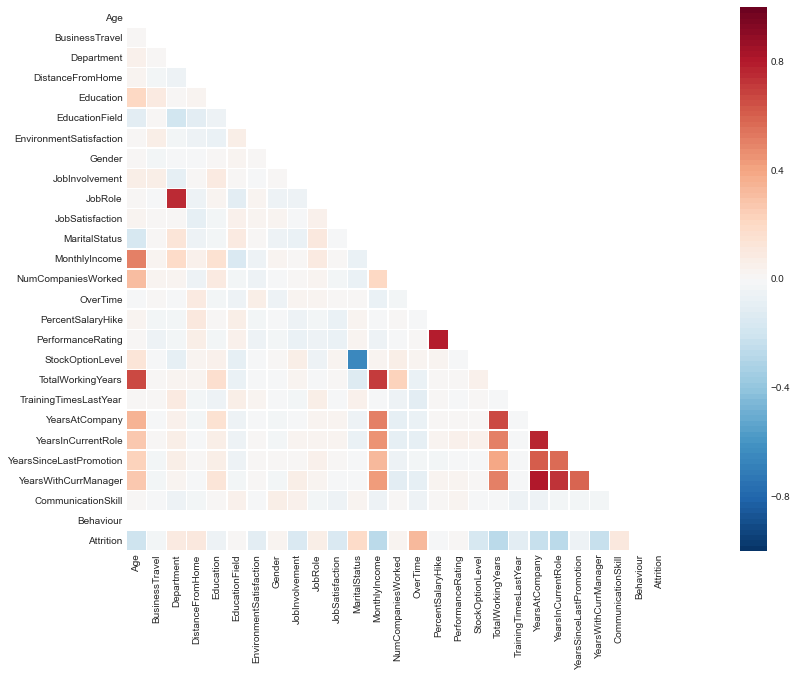

In [51]:
# Create a correlation plot of both datasets.
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 
# Generate a mask for the upper triangle
mask = np.zeros_like(dataset_con_enc.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset_con_enc.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5);

## Feature Importance
Random forest consists of a number of decision trees. Every node in the decision trees is a condition on a single feature, designed to split the dataset into two so that similar response values end up in the same set. The measure based on which the (locally) optimal condition is chosen is called impurity. When training a tree, it can be computed how much each feature decreases the weighted impurity in a tree. For a forest, the impurity decrease from each feature can be averaged and the features are ranked according to this measure. This is the feature importance measure exposed in sklearn’s Random Forest implementations.

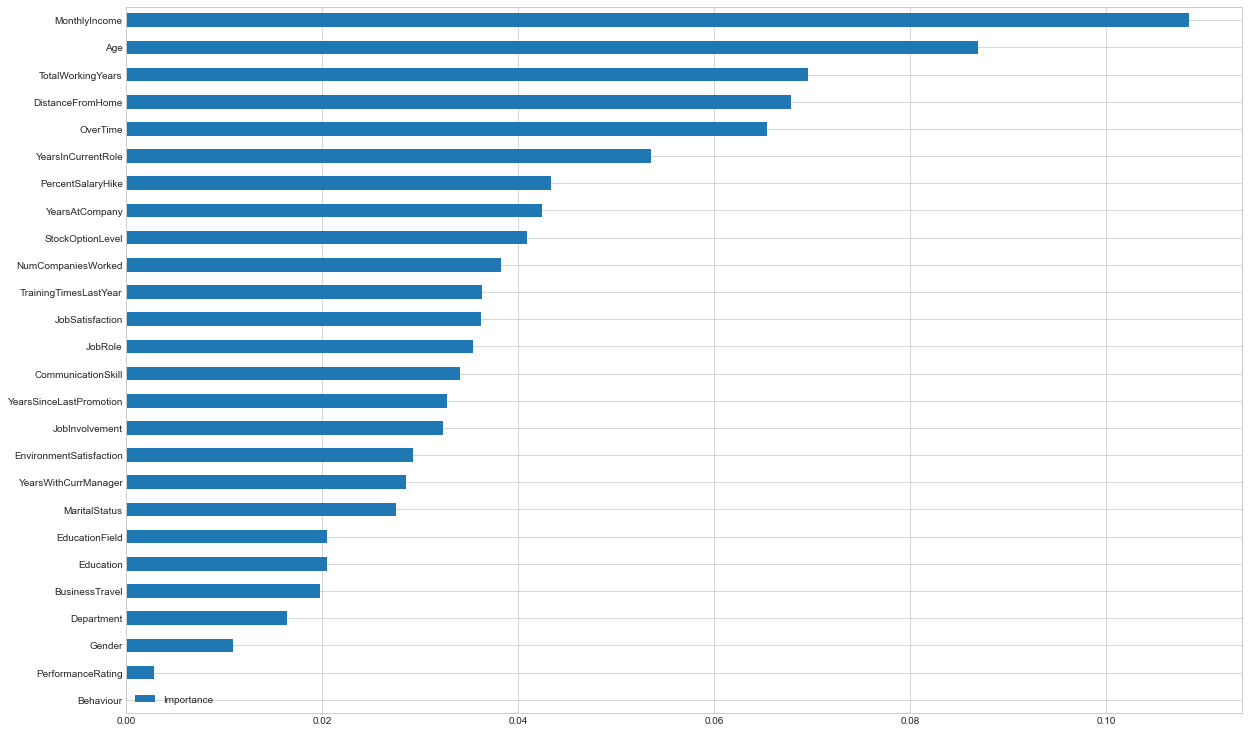

In [52]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(dataset_con_enc.drop('Attrition', axis=1), dataset_con_enc['Attrition'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=dataset_con_enc.drop('Attrition', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

In [53]:
feature_selected = list(importance.sort_values(by = 'Importance' , ascending = False)[0:17].index)

## PCA
Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.

We can use PCA to reduce the number of features to use in our ML algorithms, and graphing the variance gives us an idea of how many features we really need to represent our dataset fully.

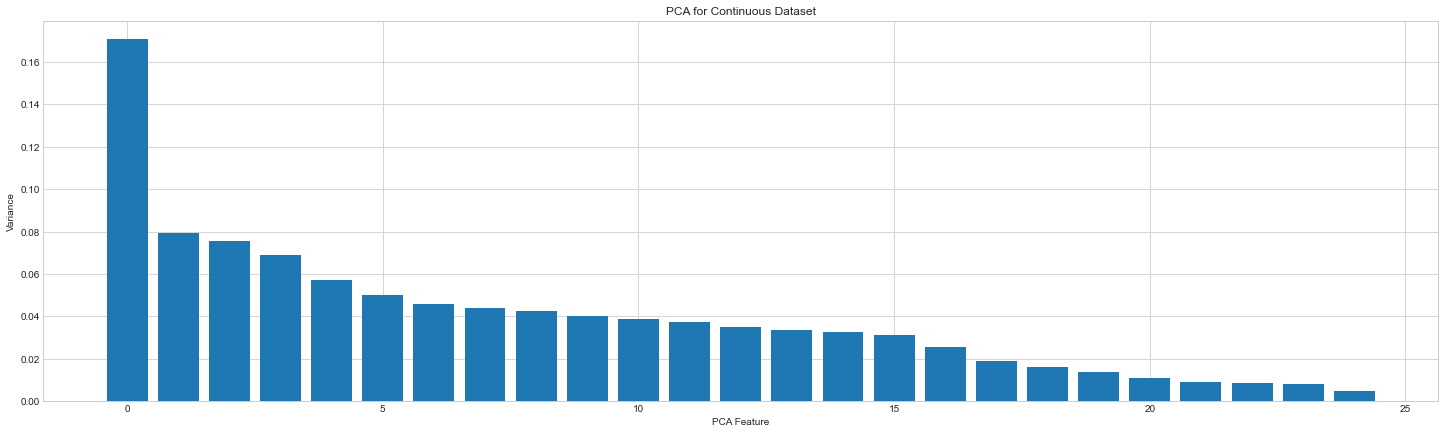

In [54]:
std_scale = preprocessing.StandardScaler().fit(dataset_con_enc.drop('Attrition', axis=1))
X = std_scale.transform(dataset_con_enc.drop('Attrition', axis=1))
pca1 = PCA(n_components=len(dataset_con_enc.columns)-2)
fit1 = pca1.fit(X)

# Graphing the variance per feature
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7)) 
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Continuous Dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_);

## Selecting Dataset
We now have two datasets to choose from to apply our ML algorithms. The one-hot-encoded, and the label-encoded. For now, we have decided not to use feature reduction or selection algorithms.

In [55]:
# OPTIONS: 
# - dataset_bin_enc
# - dataset_con_enc

# Change the dataset to test how would the algorithms perform under a differently encoded dataset.

train = dataset_con_enc

### Final Training and Testing Datasets.

In [56]:
## Final Training and Test data sets
train = train.dropna(axis = 0)
test = test_dataset_con_enc.dropna(axis = 0)

### Rename datasets before Machine Learning algos

In [57]:
X_train_w_label = train
X_train = train.drop(['Attrition'], axis=1)
y_train = train['Attrition'].astype('int64')
X_test  = test

In [58]:
train['Attrition']

0       0
1       0
2       1
3       0
4       0
       ..
1623    1
1624    1
1625    1
1626    1
1627    1
Name: Attrition, Length: 1628, dtype: int64

## Machine Learning Algorithms

### Data Review

Taking one last peek at our data before we start running the Machine Learning algorithms.

In [59]:
X_train.shape

(1628, 26)

In [60]:
X_train.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,12,0,1,1,2,1,2,0,2,1,...,0,0,12,2,11,7,6,7,3,0
1,18,2,1,11,3,1,2,0,2,3,...,0,2,7,2,3,2,1,1,1,0
2,37,2,2,1,0,1,2,1,2,5,...,0,0,12,3,9,7,7,3,4,0
3,21,2,1,23,0,1,0,1,2,4,...,0,0,18,2,7,7,1,7,3,0
4,19,2,1,2,2,2,2,1,2,3,...,0,1,10,2,10,7,7,8,0,0


In [61]:
y_train.head()

0    0
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [62]:
# Setting a random seed will guarantee we get the same results 
# every time we run our training and testing.
random.seed(1)

In [63]:
y_train.shape

(1628,)

## Algorithms

In [64]:
# Normalizing continuous variables

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
# Fitting Linear regression to the dataset 
lin_reg = LinearRegression()
lin_reg.fit(X_train , y_train)

# Predicting a new result
y_train_pred = lin_reg.predict(X_train)
y_pred_linear = lin_reg.predict(X_test) 

# CODE FOR R2 METRIC
print("Linear Regression Training R2 score is " + str(r2_score(y_train,y_train_pred)))

# CODE FOR MEAN SQUARE ERROR
print('Linear Regression Training mean_square_error is ' + str(mean_squared_error(y_train,y_train_pred)))

# CODE FOR MEAN ABSOLUTE ERROR
print('Linear Regression Training mean absolute error is ' + str(mean_absolute_error(y_train,y_train_pred)))

# Kaggle Submission score is 0.83953

Linear Regression Training R2 score is 0.35305577690439705
Linear Regression Training mean_square_error is 0.16153077227851922
Linear Regression Training mean absolute error is 0.344077541324081


In [66]:
# Fitting Logistic Regression to the dataset
log_reg = LogisticRegression()
log_reg.fit(X_train , y_train)

# Predicting a new result
y_train_pred = log_reg.predict(X_train)
y_pred_logistic = log_reg.predict_proba(X_test)[:,1]

# CODE FOR R2 METRIC
print("Logistic Regression Training R2 score is " + str(r2_score(y_train,y_train_pred)))

# CODE FOR MEAN SQUARE ERROR
print('Logistic Regression Training mean_square_error is ' + str(mean_squared_error(y_train,y_train_pred)))

# CODE FOR MEAN ABSOLUTE ERROR
print('Logistic Regression Training mean absolute error is ' + str(mean_absolute_error(y_train,y_train_pred)))

# Submission score is 0.8385

Logistic Regression Training R2 score is 0.1266556353937639
Logistic Regression Training mean_square_error is 0.21805896805896807
Logistic Regression Training mean absolute error is 0.21805896805896807


In [67]:
# Fitting Random Forest to the dataset
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state = 1)
rf_reg.fit(X_train , y_train)

# Predicting a new result
y_train_pred = rf_reg.predict(X_train)
y_pred_forest = rf_reg.predict(X_test)

# CODE FOR R2 METRIC
print("Random Forest Training R2 score is " + str(r2_score(y_train,y_train_pred)))

# CODE FOR MEAN SQUARE ERROR
print('Random Forest Regression Training mean_square_error is ' + str(mean_squared_error(y_train,y_train_pred)))

# CODE FOR MEAN ABSOLUTE ERROR
print('Random Forest Regression Training mean absolute error is ' + str(mean_absolute_error(y_train,y_train_pred)))

# Submission score is 0.7474

Random Forest Training R2 score is 0.9826909075836223
Random Forest Regression Training mean_square_error is 0.004321780712530713
Random Forest Regression Training mean absolute error is 0.03443181818181819


In [68]:
# Fitting SVR to the dataset
svr_reg = SVR(kernel = 'rbf')
y_pred_train_svr = svr_reg.fit(X_train, y_train)

# Predicting a new result
y_train_pred = svr_reg.predict(X_train)
y_pred_svr = svr_reg.predict(X_test)

# CODE FOR R2 METRIC
print("Support Vector Regression Training R2 score is " + str(r2_score(y_train,y_train_pred)))

# CODE FOR MEAN SQUARE ERROR
print('Support Vector Regression Training mean_square_error is ' + str(mean_squared_error(y_train,y_train_pred)))

# CODE FOR MEAN ABSOLUTE ERROR
print('Support Vector Regression Training mean absolute error is ' + str(mean_absolute_error(y_train,y_train_pred)))

# Submission score is 0.7474

Support Vector Regression Training R2 score is 0.4130658943060648
Support Vector Regression Training mean_square_error is 0.14654728488909163
Support Vector Regression Training mean absolute error is 0.30533036081963155


In [69]:
# Creating a DataFrame of Id and Prediction from the corresponding algorithm
Linear_Prediction = pd.DataFrame({'Id' : test_Id.values  , 'Attrition' : y_pred_linear})
Logistic_Prediction = pd.DataFrame({'Id' : test_Id.values  , 'Attrition' : y_pred_logistic})
Random_Forest_Prediction = pd.DataFrame({'Id' : test_Id.values  , 'Attrition' : y_pred_forest})
Support_Vecctor_Prediction = pd.DataFrame({'Id' : test_Id.values  , 'Attrition' : y_pred_svr})

In [71]:
# Creating a csv submission file
Random_Forest_Prediction.to_csv('C://Users//nisha/Desktop/Attrition_rf.csv' , index = False)